### **Logistic Regression Intuition**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import copy
import math
from matplotlib.patches import FancyArrowPatch
from ipywidgets import Output
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from numpy import arange

In [5]:
# X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
# print(X_train)
# y_train = np.array([0, 0, 0, 1, 1, 1])
# TO DO : Import training data from data.txt

<Axes: xlabel='x1', ylabel='x2'>

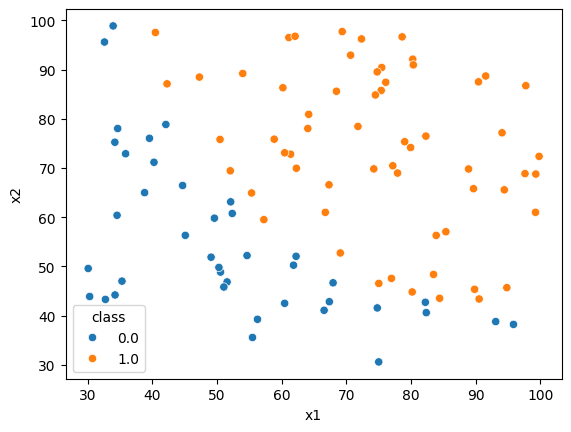

In [6]:
# Open the file in read mode
with open('data.txt', 'r', encoding='utf-8-sig') as file:  # Use 'utf-8-sig' to handle BOM
    # Read all lines from the file
    lines = file.readlines()

# Parse the data from each line
data = []
for line in lines:
    # Split the line into comma-separated values
    values = line.strip().split(',')
    
    # Convert values to float and int
    values = [float(val) if i != 2 else int(val) for i, val in enumerate(values)]
    
    # Append the parsed values to the data list
    data.append(values)

# Display the parsed data
# print(data)

# Convert to NumPy array
X_train = np.array(data)

# Assume the last element in each sublist is the label
y_train = X_train[:, -1]

# Remove the last column from X_train to get the features
X_train = X_train[:, :-1]

# print("X_train:")
# print(X_train)
# print("y_train:")
# print(y_train[0])

y_df = pd.DataFrame(y_train, columns=["class"])
X_df = pd.DataFrame(X_train, columns=['x1', 'x2'])

frames = [X_df, y_df]
data = pd.concat(frames, axis=1)
data.head()
sns.scatterplot(x="x1", y="x2", hue='class', data=data)

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# evaluate the predictions
yhat = model.predict(X_train)
acc = accuracy_score(y_train, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.890


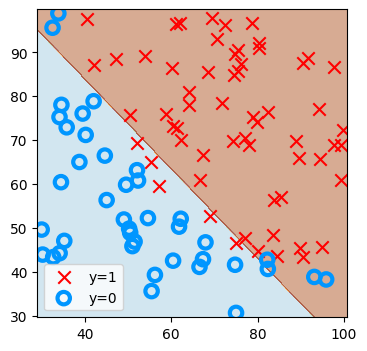

In [182]:
# define bounds of the domain
from matplotlib import pyplot
from numpy import hstack, meshgrid


min1, max1 = X_train[:, 0].min()-1, X_train[:, 0].max()+1
min2, max2 = X_train[:, 1].min()-1, X_train[:, 1].max()+1

# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))

# make predictions for the grid
yhat = model.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

pos_label="y=1"
neg_label="y=0"
fig, ax = plt.subplots(1,1,figsize=(4,4))

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired', alpha=0.5)

pos = y_train == 1
neg = y_train == 0

# Plot examples
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best')

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

# for class_value in range(2):
#     # get row indexes for samples with this class
#     row_ix = np.where(y_train == class_value)
#     # create scatter of these samples
#     plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1])

(100,)


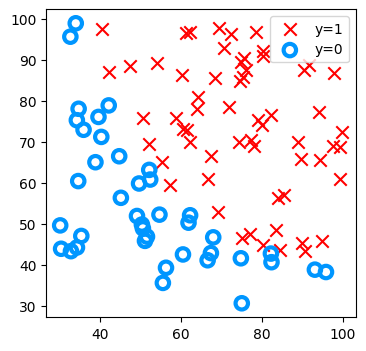

In [165]:
pos_label="y=1"
neg_label="y=0"
fig, ax = plt.subplots(1,1,figsize=(4,4))

pos = y_train == 1
neg = y_train == 0
print(pos.shape)

# Plot examples
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

In [166]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))
    return g

In [167]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    epsilon = 1e-5  # small constant to prevent log(0)
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i + epsilon) - (1-y[i])*np.log(1-f_wb_i + epsilon)

    cost = cost / m
    return cost

In [168]:
w_tmp = np.array([4.13681449, -0.60564938])
b_tmp = -76.84385216490281
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

4.417967235367285


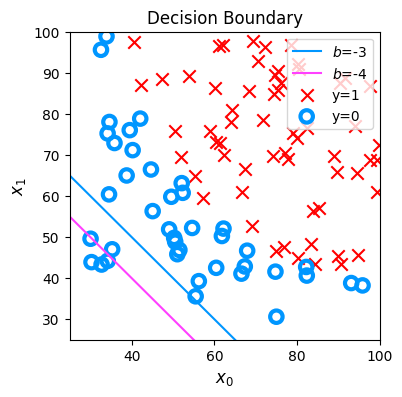

In [169]:
# Choose values between 0 and 6
x0 = np.arange(0,100)

# Plot the two decision boundaries
x1 = 90 - x0
x1_other = 80 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c='#0096ff', label="$b$=-3")
ax.plot(x0,x1_other, c='#FF40FF', label="$b$=-4")
ax.axis([25, 100, 25, 100])

# Plot the original data

ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

ax.axis([25, 100, 25, 100])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [170]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  4.60516418601809
Cost for b = -4 :  4.60516418601809


### **Gradient Descent**

In [171]:
def compute_gradient_logistic(X, y, w, b):
    """
    Computes the gradient for linear regression

    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape
    # print(m,n)
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    return dj_db, dj_dw

In [172]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Performs batch gradient descent

    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history         #return final w,b and J history for graphing

In [173]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 4.60516418601809   
Iteration 1000: Cost 7.128014911629166   
Iteration 2000: Cost 4.60516418601809   
Iteration 3000: Cost 4.374864936866064   
Iteration 4000: Cost 7.073661749761369   
Iteration 5000: Cost 4.60516418601809   
Iteration 6000: Cost 4.490622634585516   
Iteration 7000: Cost 6.864016792950803   
Iteration 8000: Cost 4.60516418601809   
Iteration 9000: Cost 4.415707649007902   

updated parameters: w:[ 4.13681449 -0.60564938], b:-76.84385216490281


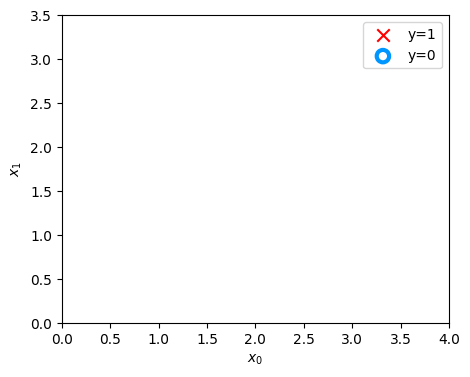

In [183]:
fig,ax = plt.subplots(1,1,figsize=(5,4))

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
ax.axis([0, 4, 0, 3.5])

# Plot examples
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c='#0096ff', lw=1)
plt.show()